# A Thaliana expression data

## Inhalt

- Auflistung und Analyse der Expressionsdatensätze für A thaliana
- Ziel: Coexpression berechnen zwischen benachbarten Genen in A Thaliana
- Möglichst viele Samples pro Gen.
- Ist die Coexpression besser, wenn viele verschiedene Zelltypen und Zustände kombiniert werden? Oder sollte die Coexpression jeweils getrennt berechnet werden? 

# Datensätze

### AtGenExpress

Der Datensatz, den ich bis jetzt benutzt habe, war Teil eines DFG-Projekts namens AtGenExpress aus den frühen 2000ern, mit dem Ziel, Co-regulation von Genen in A Thaliana anhand von Microarray Daten zu studieren (https://doi.org/10.1038/ng1543). Er enthält Daten von 79 Zellen, einmal aus Wildtyp Columbia-0, und aus diversen Mutanten. 

Auf der TAIR Website gibt es auch die restlichten Daten (https://www.arabidopsis.org/portals/expression/microarray/ATGenExpress.jsp). Der Datensatz den ich verwende war das größte Projekt mit 237 samples, insgesamt gibt es dort 997 Arrays. Dabei handelt es sich aber oft um mehrere Arrays pro Pflanze, aus denen dann bei der Normalisierung der Mittelwert berechnet wird. Um die zusätzlichen Daten zu benutzen, müsste ich die Rohdaten in R selbst verarbeiten. Ich werde erstmal gucken, ob die 79 samples schon reichen.


Ich benutze nicht die ursprüngliche Version des Datensatzes (https://www.ebi.ac.uk/arrayexpress/experiments/E-AFMX-9/), sondern eine normalisierte und mit neueren Daten annotierte Version (https://www.ebi.ac.uk/arrayexpress/experiments/E-TABM-17/), die auch von den Autoren des ursprünglichen Datensatzes empfohlen wird. 

Der einzige Nachteil ist, dass der verwendete Genchip (Affymatrix ATH1) nur 22.591 von den ca. 27.000 Genen erkennt, bei meinem Transporter-Datensatz sind das aber nicht sehr viele. 

### 1001 genomes project

Dieses Projekt (https://1001genomes.org/data-center.html) stammt von der selben Gruppe (Detlef Weigel), und hat eher Interesse an Epigenetik. Es gibt aber auch drei Transcriptomics-Projekte als Teil von dem Unterprojekt von salk (http://signal.salk.edu/1001.php):

https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE43858

- RNA-seq
- Verschiedene Wildtypen
- 144 Samples
- FPKM Normalisiert
    - TPM oft besser für Coexpression (https://pubmed.ncbi.nlm.nih.gov/22872506/)
    - TPM lässt sich aus FPKM berechnen
- AB SOLiD 4 System (Arabidopsis thaliana)

https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE54680

- mRNA-sequencing (mRNA-Seq) of 160 Arabidopsis thaliana accessions grown at 10C and 163 grown at 16C
- The source tissue for RNA collection was whole rosette at the 9-leaf stage.
- 323 Samples
- RPKM Normalisiert
- Illumina Genome Analyzer IIx (Arabidopsis thaliana)

https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE80744

- RNA-seq profiling of 728 Arabidopsis thaliana accessions
- 24176 genes
- Rohdaten verfügbar
- Normalisierte Matrix verfügbar
    - Normalisiert mit "RUVseq package" (upper quantile normalization of read counts)
    - Nur normalisierte counts, keine .. per million usw.
    - Kann ich die benutzen für coexpression, oder wären tpm besser?
- Illumina HiSeq 2500&4000 (Arabidopsis thaliana)

**RNASeq Normalisierung:**

- https://haroldpimentel.wordpress.com/2014/05/08/what-the-fpkm-a-review-rna-seq-expression-units/
- https://www.rna-seqblog.com/rpkm-fpkm-and-tpm-clearly-explained/

### ATHENA

- Eine Datenbank u.a. mit RNA-Seq Genexpressionsdaten für verschiedene Tissues von A Thaliana
- ATHENA website: http://athena.proteomics.wzw.tum.de:5002/master_arabidopsisshiny/
- Man kann die Expression für einzelne Gene abfragen, aber ich sehe keinen Download-Button für alle. Bei Tissues kann man nur Metadaten runterladen. 
- Arabidopsis Tissue Atlas der selben Gruppe: 
    - https://www.ebi.ac.uk/arrayexpress/experiments/E-MTAB-7978/
    - 56 Samples aus 30 Tissues
    - RNA-seq
    - Könnten die ATHENA Daten sein



# Paper, die Koexpressions-Analysen auf Microarrays von AT durchgeführt haben:

Suchergebnisse auf Pubmed für "coexpression a thaliana"

**Prediction of operon-like gene clusters in the Arabidopsis thaliana genome based on co-expression analysis of neighboring genes**

- https://pubmed.ncbi.nlm.nih.gov/22561113/
- 1469 ATH1 Arrays, 599 experimental conditions
    - 997 from TAIR (http://www.arabidopsis.org/portals/expression/microarray/ATGenExpress.jsp)
        - Benutze ich schon teilweise
    - 474 from European Arabidopsis Stock Centre (NASC) (https://arabidopsis.info/BrowsePage) 
        - Finde keinen Download-Link, alte Links funktionieren nicht mehr.
    - Laut paper downloadbar als Suppl. Material von anderem Paper: https://dx.doi.org/10.1093%2Fdnares%2Fdsn025
        - Suppl Table 1 enthält Liste von download-links, aber nicht Expressions-werte
- Sie scheinen die Coexpression aus allen Arrays zusammen zu berechnen, nicht getrennt. 
    - Macht eigentlich Sinn, da Gene mit funktionaler Beziehung zueinander auch unter verschiedenen Bedingungen zusammen exprimiert sind
    - Nachteile?
- Normalisiert mit Bioconductor package Affy, von Replikaten wurde Mittelwert genommen.
- Zitieren in Paper: A Thaliana enthält operon-artige Stukturen

**An extensive (co-)expression analysis tool for the cytochrome P450 superfamily in Arabidopsis thaliana**

- https://pubmed.ncbi.nlm.nih.gov/18433503/
- Publically available ATH1 microarray data
- 2202 Microarray experiments
- Expression data downloaded with "Genevestigator"
    - Public data can be accessed by academic Users
    - Sind sehr wahrscheinlich auch die Weigel-Daten, nur mit diesem Programm runtergeladen.

## Weitere Ideen zur optimierung von Coexp

- Gen-Positionen: Parameter
- Strands: Look at other coexp papers!
- GO terms: Parameter
- How many duplicated genes are deleted?
- Korrelationskoeffizient: Pearson könnte nicht gut funktionieren für RNA-seq counts 
- Nur Scores für Nachbarn nehmen, nicht für Transporter

# Analyse von E-TABM-17

## Reading sample annotation data

## Creating expression dataset

In [1]:
import subprocess

subprocess.run(
    [
        "python3",
        "../src/preprocessing/athaliana_exp.py",
        "-e",
        "../data/raw/gene_expression/athaliana/E-TABM-17-processed-data-1343490029.txt.gz",
        "-g",
        "../data/raw/gene_expression/athaliana/GPL198.annot.gz",
        "-m",
        "../data/raw/uniprot_swissprot/ARATH_3702_idmapping.dat.gz",
        "-a",
        "../data/raw/gene_expression/athaliana/E-TABM-17.sdrf.txt",
        "-o",
        "tmp/e_tabm_17_aggr.tsv",
        "--aggregate",
    ],
    check=True,
)


(47508, 79)


CompletedProcess(args=['python3', '../src/preprocessing/athaliana_exp.py', '-e', '../data/raw/gene_expression/athaliana/E-TABM-17-processed-data-1343490029.txt.gz', '-g', '../data/raw/gene_expression/athaliana/GPL198.annot.gz', '-m', '../data/raw/uniprot_swissprot/ARATH_3702_idmapping.dat.gz', '-a', '../data/raw/gene_expression/athaliana/E-TABM-17.sdrf.txt', '-o', 'tmp/e_tabm_17_aggr.tsv', '--aggregate'], returncode=0)

## Reading Expression data

### Multiple probes per gene

While analyzing the expression dataset without taking the median expression value, I found out that some genes have probes with very low and very high expression at the same time. Taking the median would not make sense in this case. 

I found the "maxmean" method in a research paper about different algorithms for aggregating microarray data, as the best compromise between complexity and good results. If there are multiple rows for a gene, it takes the row with the highest mean value.

I implemented it, and use it now in the preprocessing script.

In [2]:
import pandas as pd

df_exp = pd.read_table(
    "tmp/e_tabm_17_aggr.tsv", index_col=0
)

df_exp

,MBA:ATGE_1,MBA:ATGE_10,MBA:ATGE_100,MBA:ATGE_101,MBA:ATGE_11,MBA:ATGE_12,MBA:ATGE_13,MBA:ATGE_14,MBA:ATGE_15,MBA:ATGE_16,...,MBA:ATGE_90,MBA:ATGE_91,MBA:ATGE_92,MBA:ATGE_93,MBA:ATGE_94,MBA:ATGE_95,MBA:ATGE_96,MBA:ATGE_97,MBA:ATGE_98,MBA:ATGE_99
Uniprot,,,,,,,,,,,,,,,,,,,,,
A0A023T4L8,4.154308,4.359129,4.289895,4.310252,4.464375,4.223998,4.107007,4.222387,4.166070,4.368825,...,4.230997,4.270760,5.009404,4.268198,4.239451,4.105485,4.066176,4.090795,4.113890,4.017295
A0A068FHR7,5.941118,7.247575,7.859039,8.306622,7.039890,6.365313,6.292254,6.565299,7.234708,7.417736,...,6.623007,6.690955,7.608115,7.673751,8.272768,8.243341,6.797759,6.846840,8.359011,8.280998
A0A068FHS2,3.978072,4.100972,4.087133,4.052452,4.037100,4.035350,3.991821,4.060131,4.133924,3.964404,...,4.215006,4.844131,3.932091,6.076612,6.563566,6.489165,4.594017,4.727583,5.754927,5.877290
A0A068FIL1,5.944814,5.807904,5.595575,5.547944,5.970846,5.851633,5.834631,5.972901,5.932753,6.002064,...,5.942807,5.800905,5.767532,5.935718,6.060921,6.199717,5.718813,5.840090,5.993327,6.134785
A0A068FIL6,6.507044,7.725118,8.163116,8.907367,7.504774,6.526687,6.691165,6.933282,7.639688,7.751204,...,7.004962,7.267059,8.430001,8.328220,9.040932,9.204915,7.165126,7.136306,9.023660,8.976528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W8QPC2,5.954441,5.843262,6.714030,8.243761,5.837744,6.141159,5.974589,5.993969,6.176790,5.849948,...,5.566702,7.034936,5.436366,7.443289,5.984104,5.545319,7.362012,8.238451,6.076134,6.187735
W8QPC8,6.952998,8.890771,6.938925,7.192580,8.013038,5.816764,6.664488,7.188556,7.526334,8.027078,...,9.585682,8.758647,9.912342,8.478353,7.974850,8.275820,7.653069,8.209660,7.482398,7.569546
W8QPD2,9.295598,9.363588,9.468740,9.394966,9.220879,9.236880,9.474125,9.432601,9.454233,9.369798,...,9.069196,9.676683,8.762147,9.553789,9.578797,10.004575,9.319247,9.411000,9.599751,9.670655


### Is the data normalized?

Yes, qnorm is not necessary

In [3]:
display(df_exp.describe())
display(
    pd.concat(
        [df_exp.describe().T.mean(), df_exp.describe().T.std()],
        axis=1,
        keys=["mean", "std"],
    )
)

,MBA:ATGE_1,MBA:ATGE_10,MBA:ATGE_100,MBA:ATGE_101,MBA:ATGE_11,MBA:ATGE_12,MBA:ATGE_13,MBA:ATGE_14,MBA:ATGE_15,MBA:ATGE_16,...,MBA:ATGE_90,MBA:ATGE_91,MBA:ATGE_92,MBA:ATGE_93,MBA:ATGE_94,MBA:ATGE_95,MBA:ATGE_96,MBA:ATGE_97,MBA:ATGE_98,MBA:ATGE_99
count,47508.000000,47508.000000,47508.000000,47508.000000,47508.000000,47508.000000,47508.000000,47508.000000,47508.000000,47508.000000,...,47508.000000,47508.000000,47508.000000,47508.000000,47508.000000,47508.000000,47508.000000,47508.000000,47508.000000,47508.000000
mean,6.893323,6.892341,6.908378,6.911537,6.890164,6.914910,6.908362,6.903058,6.898610,6.898823,...,6.909691,6.901019,6.939619,6.916951,6.926305,6.914573,6.908696,6.903266,6.931992,6.921648
std,2.118505,2.109858,2.111387,2.105102,2.117209,2.139729,2.133795,2.104160,2.141230,2.105347,...,2.110676,2.102987,2.126959,2.103462,2.096495,2.073326,2.130568,2.111302,2.093073,2.087063
min,2.865894,2.842182,2.752684,2.814525,2.827976,2.774892,2.875867,2.897997,2.844484,2.820539,...,2.846214,2.867798,2.729774,2.745156,2.847501,2.828374,2.766355,2.800936,2.801593,2.791347
25%,5.134876,5.146796,5.159119,5.172573,5.138695,5.100525,5.112206,5.175027,5.096180,5.158280,...,5.134717,5.168059,5.143335,5.208859,5.194725,5.242047,5.134477,5.158292,5.218938,5.237181
50%,6.857786,6.872320,6.913452,6.936264,6.868710,6.928276,6.919069,6.881554,6.888339,6.883112,...,6.950866,6.865836,7.070750,6.920264,6.970437,6.923395,6.902016,6.912898,6.973195,6.933110
75%,8.370669,8.331214,8.378477,8.367076,8.360651,8.445768,8.403210,8.370474,8.406449,8.362520,...,8.383990,8.355036,8.415288,8.372751,8.399172,8.354256,8.401360,8.359563,8.407160,8.373958
max,13.754735,13.841570,13.526143,13.498250,13.779611,13.492263,13.594912,13.710039,13.788239,13.746719,...,13.651467,13.821552,13.476740,13.817734,13.761364,13.826285,13.624184,13.650800,13.780116,13.916927


,mean,std
count,47508.000000,0.000000
mean,6.911748,0.029124
std,2.112328,0.040779
min,2.832639,0.040934
25%,5.135377,0.065557
50%,6.956768,0.113964
75%,8.395233,0.089910
max,13.652856,0.150016


### Are there genes with variance 0?

In [4]:
min_idx = df_exp.std(axis=1).idxmin()
print("protein with min variance:")
display(df_exp.loc[min_idx].describe())


protein with min variance:


count    79.000000
mean      3.010399
std       0.048288
min       2.903659
25%       2.979093
50%       3.005153
75%       3.047197
max       3.119618
Name: Q9LRA2, dtype: float64

## Reading annotation data

In [5]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)
df_annotation_raw = pd.read_table(
    "../data/raw/gene_expression/athaliana/E-TABM-17.sdrf.txt", index_col=0,
)
df_annotation = pd.DataFrame()

df_annotation["age_days"] = df_annotation_raw["Factor Value [time]"]
df_annotation["ecotype"] = df_annotation_raw["Factor Value [ecotype]"]
df_annotation["organism_part"] = df_annotation_raw["Factor Value [organism part]"]
df_annotation["developmental_stage"] = df_annotation_raw[
    "Characteristics [developmental stage]"
]
df_annotation["sample_name"] = df_annotation_raw["Scan Name"]

df_annotation.sample_name = df_annotation.sample_name.apply(
    lambda x: "_".join(x.split("_")[:-1]).replace(" ", "")
)

df_annotation = (
    df_annotation.drop_duplicates().set_index("sample_name", drop=True).sort_index()
)

df_annotation = df_annotation.loc[df_exp.columns]
df_annotation


,age_days,ecotype,organism_part,developmental_stage
MBA:ATGE_1,7,Columbia-0,cotyledon,seedling
MBA:ATGE_10,10,Columbia-0,rosette leaf,early rosette growth
MBA:ATGE_100,21,Columbia-0,shoot,1.12 Boyes key
MBA:ATGE_101,21,Columbia-0,shoot,1.12 Boyes key
MBA:ATGE_11,10,SALK_039478,rosette leaf,early rosette growth
...,...,...,...,...
MBA:ATGE_95,8,Columbia-0,root,seedling
MBA:ATGE_96,8,Columbia-0,shoot,seedling
MBA:ATGE_97,8,Columbia-0,shoot,seedling
MBA:ATGE_98,21,Columbia-0,root,1.12 Boyes key


## Statistics

### Age

In [6]:
df_annotation.age_days.value_counts()

21+    30
17     11
7       8
56      8
21      7
8       4
10      2
14      2
15      2
22      1
23      1
35      1
42      1
28      1
Name: age_days, dtype: int64

### Organism part

In [7]:
df_annotation.organism_part.value_counts()


flower                        21
rosette leaf                  15
flower + shoot apex            7
root                           7
seed                           5
shoot                          5
silique                        3
whole_organism                 3
leaf                           2
leaf + shoot apex              2
inflorescence + shoot apex     2
pollen sac                     1
cotyledon                      1
internode                      1
cauline leaf                   1
hypocotyl                      1
petiole                        1
node                           1
Name: organism_part, dtype: int64

### Developmental stage

Paper about developmental/growth stages:

https://doi.org/10.1105/tpc.2.8.755
https://doi.org/10.1105/TPC.010011

In [8]:
df_annotation.developmental_stage.value_counts()


1.12 Boyes key            16
stage 12 flower           13
seedling                  11
stage 1 flower             9
stage 15 flower            6
early reproductive         3
complete rosette           3
early rosette growth       3
curled cotyledon stage     2
mature                     2
mid rosette growth         2
senescence                 1
stage 9 flower             1
stage 10 flower            1
pollen stage 10            1
globular stage             1
heart stage                1
triangle stage             1
torpedo stage              1
late rosette growth        1
Name: developmental_stage, dtype: int64

### Ecotypes

- Most are Columbia-0 Wildtypes, remaining are mutants. 
- Removing the mutants will probably be best.

In [9]:
df_annotation.ecotype.value_counts()


Columbia-0     63
SALK_039478     2
CLV3-7          2
LFY-12          2
AP1-15          2
CS6240          2
AP3-6           2
SALK_014999     2
UFO-1           2
Name: ecotype, dtype: int64

## Clustering

- The mutants are all in the right cluster, along with a few wildtype plants
- 4 Clusters from left to right
    - 7 samples from root
    - 11 samples from old plants, at a late state.
    - Großes gemischtes cluster, nur zwei mutanten. Nur 2 mal "flower".
    - Die samples aus organism part "flower", darunter die meisten Mutanten. Links ist ein untercluster aus "flower + shoot apex", rechts nur "flower".

Die größten Abweichungen findet man in cluster 2, in dem sich Pflanzen befinden, die 1-2 Monate alt sind. Cluster 1 hat auch ein anderes Muster, das sind samples aus "root".

Die Mutanten scheinen keinen sehr großen Unterschied zu machen, der größere Unterschied kommt von dem organism part. 

Ich würde drei Datensätze erstellen: root, das gemischte cluster, und flower.

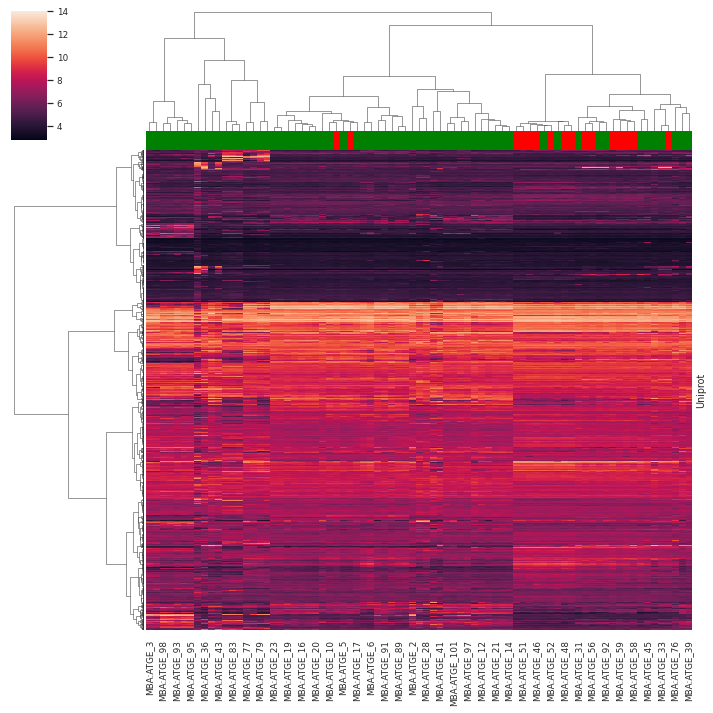

In [10]:
import seaborn as sns
import numpy as np

sns.set(font_scale=0.8)

sns.clustermap(
    df_exp,
    col_colors=np.where(df_annotation.ecotype == "Columbia-0", "green", "red"),
    method="ward",
    # row_cluster=None,
    yticklabels=[],
)
# sns.set(font_scale=1)


In [11]:
from IPython.display import display
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4)

df_annotation["cluster"] = agg.fit(df_exp.transpose()).labels_
for c in range(4):
    display(df_annotation[df_annotation.cluster == c])
    display(df_annotation[df_annotation.cluster == c].shape)



,age_days,ecotype,organism_part,developmental_stage,cluster
MBA:ATGE_36,21+,Columbia-0,flower,stage 12 flower,0
MBA:ATGE_42,21+,Columbia-0,flower,stage 15 flower,0
MBA:ATGE_43,21+,Columbia-0,flower,stage 15 flower,0
MBA:ATGE_73,42,Columbia-0,pollen sac,pollen stage 10,0
MBA:ATGE_77,56,Columbia-0,silique,heart stage,0
MBA:ATGE_78,56,Columbia-0,silique,triangle stage,0
MBA:ATGE_79,56,Columbia-0,seed,torpedo stage,0
MBA:ATGE_81,56,Columbia-0,seed,curled cotyledon stage,0
MBA:ATGE_82,56,Columbia-0,seed,curled cotyledon stage,0
MBA:ATGE_83,56,Columbia-0,seed,mature,0


(11, 5)

,age_days,ecotype,organism_part,developmental_stage,cluster
MBA:ATGE_29,21,Columbia-0,inflorescence + shoot apex,stage 1 flower,1
MBA:ATGE_31,21+,Columbia-0,flower,stage 9 flower,1
MBA:ATGE_32,21+,Columbia-0,flower,stage 10 flower,1
MBA:ATGE_33,21+,Columbia-0,flower,stage 12 flower,1
MBA:ATGE_34,21+,Columbia-0,flower,stage 12 flower,1
MBA:ATGE_35,21+,Columbia-0,flower,stage 12 flower,1
MBA:ATGE_37,21+,Columbia-0,flower,stage 12 flower,1
MBA:ATGE_39,21+,Columbia-0,flower,stage 15 flower,1
MBA:ATGE_45,21+,Columbia-0,flower,stage 15 flower,1
MBA:ATGE_46,21+,CLV3-7,flower + shoot apex,stage 1 flower,1


(26, 5)

,age_days,ecotype,organism_part,developmental_stage,cluster
MBA:ATGE_1,7,Columbia-0,cotyledon,seedling,2
MBA:ATGE_10,10,Columbia-0,rosette leaf,early rosette growth,2
MBA:ATGE_100,21,Columbia-0,shoot,1.12 Boyes key,2
MBA:ATGE_101,21,Columbia-0,shoot,1.12 Boyes key,2
MBA:ATGE_11,10,SALK_039478,rosette leaf,early rosette growth,2
MBA:ATGE_12,17,Columbia-0,rosette leaf,1.12 Boyes key,2
MBA:ATGE_13,17,Columbia-0,rosette leaf,1.12 Boyes key,2
MBA:ATGE_14,17,Columbia-0,rosette leaf,1.12 Boyes key,2
MBA:ATGE_15,17,Columbia-0,rosette leaf,1.12 Boyes key,2
MBA:ATGE_16,17,Columbia-0,rosette leaf,1.12 Boyes key,2


(35, 5)

,age_days,ecotype,organism_part,developmental_stage,cluster
MBA:ATGE_3,7,Columbia-0,root,seedling,3
MBA:ATGE_9,17,Columbia-0,root,1.12 Boyes key,3
MBA:ATGE_93,15,Columbia-0,root,mid rosette growth,3
MBA:ATGE_94,8,Columbia-0,root,seedling,3
MBA:ATGE_95,8,Columbia-0,root,seedling,3
MBA:ATGE_98,21,Columbia-0,root,1.12 Boyes key,3
MBA:ATGE_99,21,Columbia-0,root,1.12 Boyes key,3


(7, 5)

## Correlation



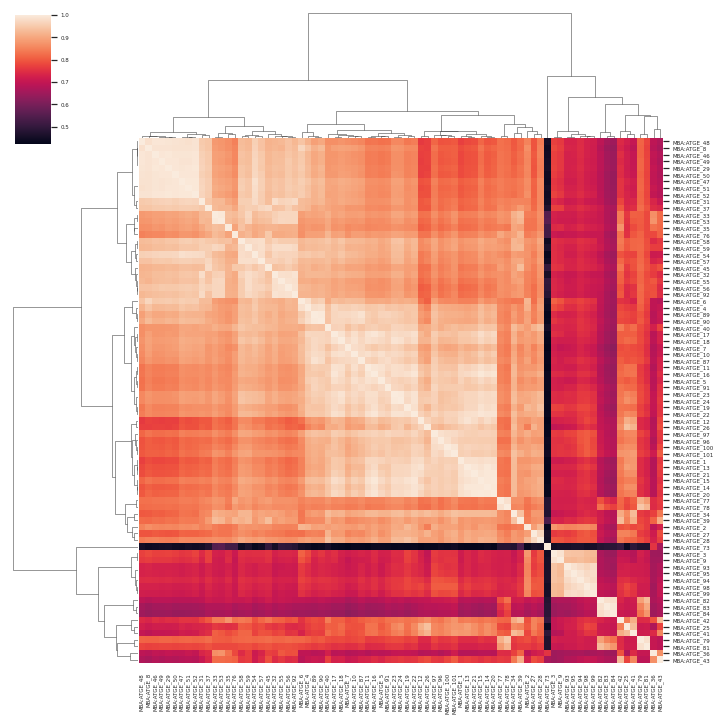

In [12]:
sns.set(rc={"figure.figsize": (30, 20)})  # width=3, #height=4
sns.set(font_scale=0.5)
sns.clustermap(
    df_exp.corr(method="pearson"),
    xticklabels=df_exp.columns,
    yticklabels=df_exp.columns,
    method="ward",
)



In [13]:
agg = AgglomerativeClustering(n_clusters=6)

df_annotation["cluster"] = agg.fit(df_exp.corr()).labels_
for c in range(6):
    display(df_annotation[df_annotation.cluster == c])
    display(df_annotation[df_annotation.cluster == c].shape)



,age_days,ecotype,organism_part,developmental_stage,cluster
MBA:ATGE_1,7,Columbia-0,cotyledon,seedling,0
MBA:ATGE_10,10,Columbia-0,rosette leaf,early rosette growth,0
MBA:ATGE_100,21,Columbia-0,shoot,1.12 Boyes key,0
MBA:ATGE_101,21,Columbia-0,shoot,1.12 Boyes key,0
MBA:ATGE_11,10,SALK_039478,rosette leaf,early rosette growth,0
MBA:ATGE_12,17,Columbia-0,rosette leaf,1.12 Boyes key,0
MBA:ATGE_13,17,Columbia-0,rosette leaf,1.12 Boyes key,0
MBA:ATGE_14,17,Columbia-0,rosette leaf,1.12 Boyes key,0
MBA:ATGE_15,17,Columbia-0,rosette leaf,1.12 Boyes key,0
MBA:ATGE_16,17,Columbia-0,rosette leaf,1.12 Boyes key,0


(37, 5)

,age_days,ecotype,organism_part,developmental_stage,cluster
MBA:ATGE_25,35,Columbia-0,leaf,senescence,1
MBA:ATGE_36,21+,Columbia-0,flower,stage 12 flower,1
MBA:ATGE_41,21+,Columbia-0,flower,stage 15 flower,1
MBA:ATGE_42,21+,Columbia-0,flower,stage 15 flower,1
MBA:ATGE_43,21+,Columbia-0,flower,stage 15 flower,1
MBA:ATGE_79,56,Columbia-0,seed,torpedo stage,1
MBA:ATGE_81,56,Columbia-0,seed,curled cotyledon stage,1


(7, 5)

,age_days,ecotype,organism_part,developmental_stage,cluster
MBA:ATGE_82,56,Columbia-0,seed,curled cotyledon stage,2
MBA:ATGE_83,56,Columbia-0,seed,mature,2
MBA:ATGE_84,56,Columbia-0,seed,mature,2


(3, 5)

,age_days,ecotype,organism_part,developmental_stage,cluster
MBA:ATGE_29,21,Columbia-0,inflorescence + shoot apex,stage 1 flower,3
MBA:ATGE_31,21+,Columbia-0,flower,stage 9 flower,3
MBA:ATGE_32,21+,Columbia-0,flower,stage 10 flower,3
MBA:ATGE_33,21+,Columbia-0,flower,stage 12 flower,3
MBA:ATGE_35,21+,Columbia-0,flower,stage 12 flower,3
MBA:ATGE_37,21+,Columbia-0,flower,stage 12 flower,3
MBA:ATGE_45,21+,Columbia-0,flower,stage 15 flower,3
MBA:ATGE_46,21+,CLV3-7,flower + shoot apex,stage 1 flower,3
MBA:ATGE_47,21+,LFY-12,flower + shoot apex,stage 1 flower,3
MBA:ATGE_48,21+,AP1-15,flower + shoot apex,stage 1 flower,3


(24, 5)

,age_days,ecotype,organism_part,developmental_stage,cluster
MBA:ATGE_3,7,Columbia-0,root,seedling,4
MBA:ATGE_9,17,Columbia-0,root,1.12 Boyes key,4
MBA:ATGE_93,15,Columbia-0,root,mid rosette growth,4
MBA:ATGE_94,8,Columbia-0,root,seedling,4
MBA:ATGE_95,8,Columbia-0,root,seedling,4
MBA:ATGE_98,21,Columbia-0,root,1.12 Boyes key,4
MBA:ATGE_99,21,Columbia-0,root,1.12 Boyes key,4


(7, 5)

,age_days,ecotype,organism_part,developmental_stage,cluster
MBA:ATGE_73,42,Columbia-0,pollen sac,pollen stage 10,5


(1, 5)

# Analyse E-TABM-17 filtered

- Filtered first to remove mutants
- Later filtered for four most common tissues

In [14]:
df_annotation_col = df_annotation[df_annotation.ecotype == "Columbia-0"].copy()

df_annotation_col = df_annotation_col[
    df_annotation.organism_part.isin({"flower", "rosette leaf", "root", "seed"})
]
df_exp_col = df_exp[df_annotation_col.index]
print(df_annotation_col.shape, df_exp_col.shape)
print(df_annotation_col.age_days.unique())


(39, 5) (47508, 39)
['10' '17' '7' '21+' '56' '14' '21' '28' '15' '8']


/tmp/ipykernel_1946/2468175207.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_annotation_col = df_annotation_col[


### Statistics

In [15]:
df_annotation_col.organism_part.value_counts()

flower          14
rosette leaf    13
root             7
seed             5
Name: organism_part, dtype: int64

## Clustering

{'flower': 'red', 'root': 'green', 'rosette leaf': 'blue', 'seed': 'magenta'}


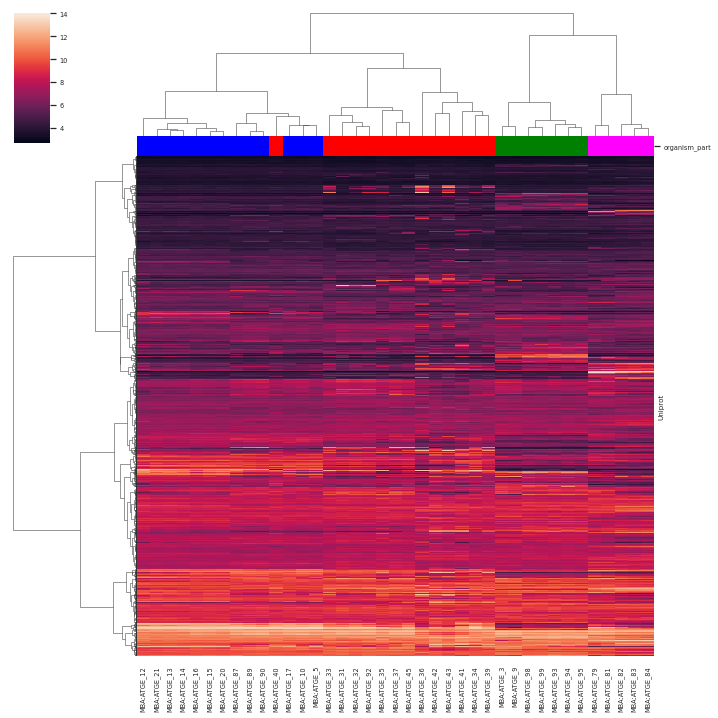

In [16]:
import seaborn as sns
import numpy as np

colors = ["red", "green", "blue", "magenta"]
labels = sorted(df_annotation_col.organism_part.unique())
label_to_color = {label: color for label, color in zip(labels, colors)}
print(label_to_color)
col_colors = df_annotation_col.loc[df_exp_col.columns].organism_part.map(label_to_color)
sns.set(font_scale=0.6)
sns.clustermap(
    df_exp_col,
    method="ward",
    col_colors=col_colors,
    yticklabels=[],
    # row_cluster=None
)


In [17]:
from IPython.display import display
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4, linkage="ward")

df_annotation_col["cluster"] = agg.fit(df_exp_col.transpose()).labels_
for c in range(df_annotation_col["cluster"].max()):
    display(df_annotation_col[df_annotation_col.cluster == c])
    display(df_annotation_col[df_annotation_col.cluster == c].shape)

,age_days,ecotype,organism_part,developmental_stage,cluster
MBA:ATGE_31,21+,Columbia-0,flower,stage 9 flower,0
MBA:ATGE_32,21+,Columbia-0,flower,stage 10 flower,0
MBA:ATGE_33,21+,Columbia-0,flower,stage 12 flower,0
MBA:ATGE_34,21+,Columbia-0,flower,stage 12 flower,0
MBA:ATGE_35,21+,Columbia-0,flower,stage 12 flower,0
MBA:ATGE_36,21+,Columbia-0,flower,stage 12 flower,0
MBA:ATGE_37,21+,Columbia-0,flower,stage 12 flower,0
MBA:ATGE_39,21+,Columbia-0,flower,stage 15 flower,0
MBA:ATGE_41,21+,Columbia-0,flower,stage 15 flower,0
MBA:ATGE_42,21+,Columbia-0,flower,stage 15 flower,0


(13, 5)

,age_days,ecotype,organism_part,developmental_stage,cluster
MBA:ATGE_10,10,Columbia-0,rosette leaf,early rosette growth,1
MBA:ATGE_12,17,Columbia-0,rosette leaf,1.12 Boyes key,1
MBA:ATGE_13,17,Columbia-0,rosette leaf,1.12 Boyes key,1
MBA:ATGE_14,17,Columbia-0,rosette leaf,1.12 Boyes key,1
MBA:ATGE_15,17,Columbia-0,rosette leaf,1.12 Boyes key,1
MBA:ATGE_16,17,Columbia-0,rosette leaf,1.12 Boyes key,1
MBA:ATGE_17,17,Columbia-0,rosette leaf,1.12 Boyes key,1
MBA:ATGE_20,17,Columbia-0,rosette leaf,1.12 Boyes key,1
MBA:ATGE_21,17,Columbia-0,rosette leaf,1.12 Boyes key,1
MBA:ATGE_40,21+,Columbia-0,flower,stage 15 flower,1


(14, 5)

,age_days,ecotype,organism_part,developmental_stage,cluster
MBA:ATGE_3,7,Columbia-0,root,seedling,2
MBA:ATGE_9,17,Columbia-0,root,1.12 Boyes key,2
MBA:ATGE_93,15,Columbia-0,root,mid rosette growth,2
MBA:ATGE_94,8,Columbia-0,root,seedling,2
MBA:ATGE_95,8,Columbia-0,root,seedling,2
MBA:ATGE_98,21,Columbia-0,root,1.12 Boyes key,2
MBA:ATGE_99,21,Columbia-0,root,1.12 Boyes key,2


(7, 5)

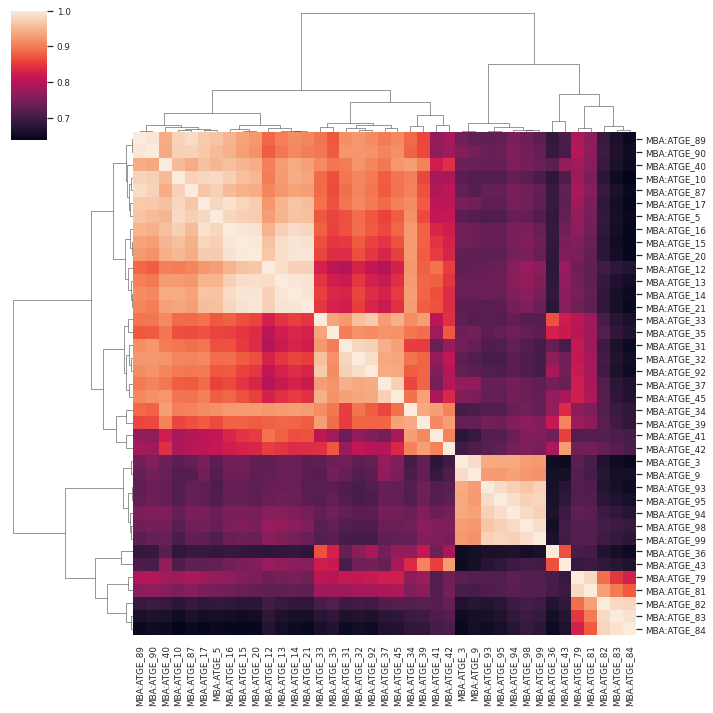

In [18]:
sns.set(rc={"figure.figsize": (30, 20)})  # width=3, #height=4
sns.set(font_scale=0.8)
sns.clustermap(
    df_exp_col.corr(method="pearson"),
    xticklabels=df_exp_col.columns,
    yticklabels=df_exp_col.columns,
    method="ward",
)


## Do the individual datasets need to be normalized again?

The standard deviation of the mean of the standard deviation of the samples does not change significantly by selecting subsets based on tissue. Therefore, normalization is not necessary.

In [19]:
from qnorm import quantile_normalize

display(
    pd.concat(
        [df_exp.describe().T.mean(), df_exp.describe().T.std()],
        axis=1,
        keys=["mean", "std"],
    )
)
display(
    pd.concat(
        [df_exp_col.describe().T.mean(), df_exp_col.describe().T.std()],
        axis=1,
        keys=["mean", "std"],
    )
)

for cluster_name in df_annotation_col.cluster.unique():
    print("Cluster",cluster_name)
    df_exp_cl = df_exp[df_annotation_col[df_annotation_col.cluster == cluster_name].index]
    display(
        pd.concat(
            [df_exp_cl.describe().T.mean(), df_exp_cl.describe().T.std()],
            axis=1,
            keys=["mean", "std"],
        )
    )
    # df_exp_cl_norm = quantile_normalize(df_exp_cl)
    # display(
    #     pd.concat(
    #         [df_exp_cl_norm.describe().T.mean(), df_exp_cl_norm.describe().T.std().round(6)],
    #         axis=1,
    #         keys=["mean", "std"],
    #     )
    # )

,mean,std
count,47508.000000,0.000000
mean,6.911748,0.029124
std,2.112328,0.040779
min,2.832639,0.040934
25%,5.135377,0.065557
50%,6.956768,0.113964
75%,8.395233,0.089910
max,13.652856,0.150016


,mean,std
count,47508.000000,0.000000
mean,6.907293,0.027571
std,2.108206,0.029980
min,2.832509,0.039116
25%,5.146826,0.049591
50%,6.921683,0.102936
75%,8.393070,0.046445
max,13.711200,0.163871


Cluster 1


,mean,std
count,47508.000000,0.000000
mean,6.902724,0.009784
std,2.118467,0.015037
min,2.846187,0.030080
25%,5.130702,0.028673
50%,6.901993,0.038415
75%,8.381355,0.031588
max,13.711098,0.099901


Cluster 2


,mean,std
count,47508.000000,0.000000
mean,6.925404,0.011222
std,2.095127,0.013173
min,2.804032,0.032271
25%,5.211973,0.027681
50%,6.949446,0.024016
75%,8.389382,0.022182
max,13.775324,0.091736


Cluster 0


,mean,std
count,47508.000000,0.000000
mean,6.922610,0.017552
std,2.123997,0.018457
min,2.825935,0.049040
25%,5.121206,0.047765
50%,6.987931,0.096755
75%,8.431374,0.035078
max,13.566594,0.101724


Cluster 3


,mean,std
count,47508.000000,0.000000
mean,6.854910,0.030949
std,2.056728,0.041602
min,2.851173,0.012972
25%,5.167383,0.041216
50%,6.765707,0.139765
75%,8.331443,0.052926
max,13.997688,0.035451


## Korrelationen


**Problem:**

Many (600) proteins in the dataset have exactly the same expression pattern

**Example:**

- Probes from array are converted to Entrez IDs, because they are stable
- Entrez IDs are converted to Uniprot
- The conversion file contains several Entrez IDs for some probes.
- Example: 
    - Protein Q9FWX7: Symbol ABCB11, GeneID 839353
    - Protein Q9FWX8: Symbol ABCB12, GeneID 839282
    - Uniprot file is correct, so GPL seems to be the problem.
    - In GPL file: 
        - 260932_s_at	P-glycoprotein 11///P-glycoprotein 12	PGP11///PGP12	839353///839282	
    - It seems to be a probe that represents both!

**Reason:**

- This is caused by probes that represent multiple proteins. 

# Final datasets

In the end, I decided to create five datasets:

- Columbia-0
- Columbia-0 (root)
- Columbia-0 (seed)     
- Columbia-0 (rosette leaf)
- Columbia-0 (flower)
- Columbia-0 (root, flower, seed, rosette leaf)

This is a selection of more diverse gene expression across multiple tissues, and more uniform expression. I will try calculating coexp with each of these, to figure out what works best. 

The concern is that, if samples are too similar, I'm essentially calculating the correlation coefficient from constants, not variables. That could negatively influence the results.